# Validity of using prescription records to identify patient comorbidities
## Analysis of T2DM

**ReadMe:**
- This is a script used in the analysis for Schnier et al., 2025: Validity of using prescription records to classify disease – a record linkage study using routinely collected electronic health records from the UK.
- The underlying data set has been created using the Optimum Patient Care Research Database (https://opcrd.optimumpatientcare.org/). The authors do not have permission to give the public access to the study dataset; researchers may request access to OPCRD for their own purposes. 
 - All code is run in StataSE 18. 


**Set up:**
|Var|Input|
| --- | --- | 
|population|425,000|
|diagnostic codes|OpenCodelist (Snomed) and HDRUK (read)|
|drug codes|bnf 06.06.02|
|sql date|13.03.2025|
|sql code|T2dibetesselection20250313.sql| 

In [1]:
    clear all

### Import from SQL server and data wrangling

In [2]:
odbc load, exec("select * from [t2diabetes_425000_20250313]") dsn("sqlserverconnect")

In [3]:
generate test=0 if missing(drug_dt)
replace test=1 if ! missing(drug_dt)  

generate diag=0 if missing(diag_dt)
replace diag=1 if ! missing(diag_dt)  

gen start_year=year(fu_start_dt)


egen agecat = cut(age), at(16,30,70,120)
label def agecat_lab 16 "Young" 30 "0Middle" 70 "Elderly" 120 "weird"
label values agecat agecat_lab


egen yearcat = cut(start_year), at(2004,2010,2016,2025)
label def yearcat_lab 2004 "2004-2009" 2010 "2010-2015" 2016 "2016-2020" 
label values yearcat yearcat_lab

egen imdcat = cut(imd_decile), at(0,4,8,11)
label def imdcat_lab 0 "1-3" 4 "4-7" 8 "8-10" 
label values imdcat imdcat_lab


replace bnf_code = "Antidiabetic drugs" if bnf_code== "060102"
replace bnf_code = "Other/unknown" if missing(bnf_code) & ! missing(drug_dt)



replace ethnicity="0white" if ethnicity=="1"
replace ethnicity="Other" if ethnicity=="2"
replace ethnicity="Other" if ethnicity=="3"
replace ethnicity="Other" if ethnicity=="4"
replace ethnicity="Other" if ethnicity=="5"
replace ethnicity="Missing" if ethnicity=="99"




encode bnf_code, generate(bnf_code_values) 
encode description, generate(description_values)
encode ethnicity, generate(ethnicity_values) 

gen diag_neg=diag==0
gen diag_pos=diag==1
encode region_name, generate(region) label(regionlbl)
encode ethnicity, generate(ethnic)

(23,990 missing values generated)
(23,990 real changes made)
(20,289 missing values generated)
(20,289 real changes made)
(2,589 missing values generated)
variable bnf_code was str6 now str18
(23,953 real changes made)
(35 real changes made)
variable ethnicity was str2 now str6
(258,007 real changes made)
(3,762 real changes made)
(23,924 real changes made)
(7,431 real changes made)
(8,765 real changes made)
variable ethnicity was str6 now str7
(123,166 real changes made)


(bin=19, start=16, width=5)


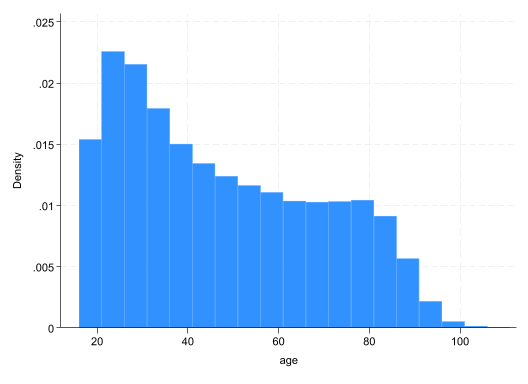

In [4]:
histogram age, width(5)


This table holds one randomly selected diagnostic code found during the observation period. The table is truncated to only include diagnostic codes with a count of 10 or more.

In [5]:
set linesize 132
groups description , select(f >= 10) ord(h) table 


  +---------------------------------------------------------------------------------------+
  |                                                 description   Freq.   Percent     %<= |
  |---------------------------------------------------------------------------------------|
  |                                    Diabetes mellitus type 2    9059     44.65   44.65 |
  |                                   Type II diabetes mellitus    6156     30.34   74.99 |
  |                             Type II diabetic dietary review    2757     13.59   88.58 |
  |                                      Diabetes type 2 review     618      3.05   91.63 |
  |                                     Diabetes type II review     463      2.28   93.91 |
  |---------------------------------------------------------------------------------------|
  |                    Insulin treated type 2 diabetes mellitus     206      1.02   94.92 |
  |                         History of diabetes mellitus type 2     153      0.

These tables holds one randomly selected prescrption during the observation period. The table is truncated to only include codes with a count of 10 or more.


In [6]:
set linesize 132
groups bnf_code , select(f >= 10) ord(h) table 


  +----------------------------------------------+
  |           bnf_code   Freq.   Percent     %<= |
  |----------------------------------------------|
  | Antidiabetic drugs   23953     99.85   99.85 |
  |      Other/unknown      35      0.15   99.99 |
  +----------------------------------------------+


### Results
#### Overall

In [7]:
diagt diag test


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    14,740      5,549 |    20,289 
    Normal |     9,250    395,516 |   404,766 
-----------+----------------------+----------
     Total |    23,990    401,065 |   425,055 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.8%      4.7%       4.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.7%     72.0%     73.3%
Specificity                      Pr(-|N)     97.7%     97.7%     97.8%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.79     31.

#### Males

In [8]:
diagt diag test if sex==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,376      2,938 |    11,314 
    Normal |     4,588    192,413 |   197,001 
-----------+----------------------+----------
     Total |    12,964    195,351 |   208,315 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.4%      5.3%       5.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     74.0%     73.2%     74.8%
Specificity                      Pr(-|N)     97.7%     97.6%     97.7%
ROC area               (Sens. + Spec.)/2      0.86      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.79     30.

#### Females

In [9]:
diagt diag test if sex==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,363      2,611 |     8,974 
    Normal |     4,662    203,095 |   207,757 
-----------+----------------------+----------
     Total |    11,025    205,706 |   216,731 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.1%      4.1%       4.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     70.9%     70.0%     71.8%
Specificity                      Pr(-|N)     97.8%     97.7%     97.8%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     31.60     30.

#### Age
*16-30*

In [10]:
diagt diag test if agecat==16


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       164         60 |       224 
    Normal |       592    116,859 |   117,451 
-----------+----------------------+----------
     Total |       756    116,919 |   117,675 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      0.2%      0.2%       0.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     73.2%     66.9%     78.9%
Specificity                      Pr(-|N)     99.5%     99.5%     99.5%
ROC area               (Sens. + Spec.)/2      0.86      0.83      0.89 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)    145.25    129.

*30-69*

In [11]:
diagt diag test if agecat==30


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     7,947      2,374 |    10,321 
    Normal |     4,573    206,542 |   211,115 
-----------+----------------------+----------
     Total |    12,520    208,916 |   221,436 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.7%      4.6%       4.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     77.0%     76.2%     77.8%
Specificity                      Pr(-|N)     97.8%     97.8%     97.9%
ROC area               (Sens. + Spec.)/2      0.87      0.87      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     35.55     34.

*>69*

In [12]:
diagt diag test if agecat==70


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,629      3,115 |     9,744 
    Normal |     4,085     72,115 |    76,200 
-----------+----------------------+----------
     Total |    10,714     75,230 |    85,944 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)     11.3%     11.1%      11.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     68.0%     67.1%     69.0%
Specificity                      Pr(-|N)     94.6%     94.5%     94.8%
ROC area               (Sens. + Spec.)/2      0.81      0.81      0.82 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     12.69     12.

#### Year at start of oberservation period 
*2004-2009*

In [13]:
diagt diag test if yearcat==2004


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,827      1,966 |     6,793 
    Normal |     3,337    139,893 |   143,230 
-----------+----------------------+----------
     Total |     8,164    141,859 |   150,023 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.5%      4.4%       4.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.1%     70.0%     72.1%
Specificity                      Pr(-|N)     97.7%     97.6%     97.7%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.50     29.

*2010-2015*

In [14]:
diagt diag test if yearcat==2010


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,373      2,111 |     7,484 
    Normal |     2,936    139,605 |   142,541 
-----------+----------------------+----------
     Total |     8,309    141,716 |   150,025 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.0%      4.9%       5.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.8%     70.8%     72.8%
Specificity                      Pr(-|N)     97.9%     97.9%     98.0%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     34.86     33.

*2016-2020*

In [15]:
diagt diag test if yearcat==2016


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     4,540      1,472 |     6,012 
    Normal |     2,977    116,018 |   118,995 
-----------+----------------------+----------
     Total |     7,517    117,490 |   125,007 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.8%      4.7%       4.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.5%     74.4%     76.6%
Specificity                      Pr(-|N)     97.5%     97.4%     97.6%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.18     29.

#### IMD of practice
*1-3*

In [16]:
diagt diag test if imdcat==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,785      2,067 |     7,852 
    Normal |     4,104    142,620 |   146,724 
-----------+----------------------+----------
     Total |     9,889    144,687 |   154,576 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.1%      5.0%       5.2%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     73.7%     72.7%     74.6%
Specificity                      Pr(-|N)     97.2%     97.1%     97.3%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     26.34     25.

*4-7*

In [17]:
diagt diag test if imdcat==4


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     5,089      1,973 |     7,062 
    Normal |     3,024    132,970 |   135,994 
-----------+----------------------+----------
     Total |     8,113    134,943 |   143,056 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.9%      4.8%       5.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.1%     71.0%     73.1%
Specificity                      Pr(-|N)     97.8%     97.7%     97.9%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.41     31.

*8-10*

In [18]:
diagt diag test if imdcat==8


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,844      1,502 |     5,346 
    Normal |     2,116    117,372 |   119,488 
-----------+----------------------+----------
     Total |     5,960    118,874 |   124,834 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.3%      4.2%       4.4%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.9%     70.7%     73.1%
Specificity                      Pr(-|N)     98.2%     98.2%     98.3%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     40.60     38.

#### Commissioning Regions
EAST OF ENGLAND

In [19]:
diagt diag test if regexm(region_name,"ENGLAND")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,472      1,131 |     4,603 
    Normal |     2,172     82,884 |    85,056 
-----------+----------------------+----------
     Total |     5,644     84,015 |    89,659 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.1%      5.0%       5.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.4%     74.2%     76.7%
Specificity                      Pr(-|N)     97.4%     97.3%     97.6%
ROC area               (Sens. + Spec.)/2      0.86      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     29.54     28.

London

In [20]:
diagt diag test if regexm(region_name,"LONDON")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       422        121 |       543 
    Normal |       172     16,011 |    16,183 
-----------+----------------------+----------
     Total |       594     16,132 |    16,726 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      3.2%      3.0%       3.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     77.7%     74.0%     81.1%
Specificity                      Pr(-|N)     98.9%     98.8%     99.1%
ROC area               (Sens. + Spec.)/2      0.88      0.87      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     73.12     62.

Midlands

In [21]:
diagt diag test if regexm(region_name,"MID")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,117        703 |     2,820 
    Normal |     1,065     42,659 |    43,724 
-----------+----------------------+----------
     Total |     3,182     43,362 |    46,544 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      6.1%      5.8%       6.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.1%     73.4%     76.7%
Specificity                      Pr(-|N)     97.6%     97.4%     97.7%
ROC area               (Sens. + Spec.)/2      0.86      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.82     28.

Yorkshire

In [22]:
diagt diag test if regexm(region_name,"YORK")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,145      1,484 |     4,629 
    Normal |     2,231     79,266 |    81,497 
-----------+----------------------+----------
     Total |     5,376     80,750 |    86,126 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.4%      5.2%       5.5%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     67.9%     66.6%     69.3%
Specificity                      Pr(-|N)     97.3%     97.1%     97.4%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.83 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.82     23.

North West

In [23]:
diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,483        483 |     1,966 
    Normal |       814     44,816 |    45,630 
-----------+----------------------+----------
     Total |     2,297     45,299 |    47,596 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.1%      4.0%       4.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.4%     73.5%     77.3%
Specificity                      Pr(-|N)     98.2%     98.1%     98.3%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.88 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     42.28     39.

South East

In [24]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,714      1,014 |     3,728 
    Normal |     1,450     85,312 |    86,762 
-----------+----------------------+----------
     Total |     4,164     86,326 |    90,490 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.1%      4.0%       4.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.8%     71.3%     74.2%
Specificity                      Pr(-|N)     98.3%     98.2%     98.4%
ROC area               (Sens. + Spec.)/2      0.86      0.85      0.86 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     43.56     41.

South West

In [25]:
diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     1,218        531 |     1,749 
    Normal |       998     33,431 |    34,429 
-----------+----------------------+----------
     Total |     2,216     33,962 |    36,178 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.8%      4.6%       5.1%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     69.6%     67.4%     71.8%
Specificity                      Pr(-|N)     97.1%     96.9%     97.3%
ROC area               (Sens. + Spec.)/2      0.83      0.82      0.84 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     24.02     22.

#### System
SystmOne

In [26]:
diagt diag test if regexm(system,"One")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     8,388      3,415 |    11,803 
    Normal |     6,063    210,928 |   216,991 
-----------+----------------------+----------
     Total |    14,451    214,343 |   228,794 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.2%      5.1%       5.3%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.1%     70.2%     71.9%
Specificity                      Pr(-|N)     97.2%     97.1%     97.3%
ROC area               (Sens. + Spec.)/2      0.84      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     25.43     24.

Vision

In [27]:
diagt diag test if regexm(system,"Vision")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |       242         96 |       338 
    Normal |       413     12,999 |    13,412 
-----------+----------------------+----------
     Total |       655     13,095 |    13,750 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.5%      2.2%       2.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.6%     66.5%     76.3%
Specificity                      Pr(-|N)     96.9%     96.6%     97.2%
ROC area               (Sens. + Spec.)/2      0.84      0.82      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     23.25     20.

EMIS

In [28]:
diagt diag test if regexm(ustrupper(system),"EMIS")==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     6,107      2,038 |     8,145 
    Normal |     2,763    171,467 |   174,230 
-----------+----------------------+----------
     Total |     8,870    173,505 |   182,375 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.5%      4.4%       4.6%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     75.0%     74.0%     75.9%
Specificity                      Pr(-|N)     98.4%     98.4%     98.5%
ROC area               (Sens. + Spec.)/2      0.87      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     47.28     45.

#### RA_Index
Index==1

In [29]:
diagt diag test if RA_index==1


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    11,171      4,353 |    15,524 
    Normal |     6,770    299,440 |   306,210 
-----------+----------------------+----------
     Total |    17,941    303,793 |   321,734 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.8%      4.8%       4.9%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     72.0%     71.2%     72.7%
Specificity                      Pr(-|N)     97.8%     97.7%     97.8%
ROC area               (Sens. + Spec.)/2      0.85      0.85      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     32.55     31.

Index==0

In [30]:
diagt diag test if RA_index==0


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     3,569      1,196 |     4,765 
    Normal |     2,480     96,076 |    98,556 
-----------+----------------------+----------
     Total |     6,049     97,272 |   103,321 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      4.6%      4.5%       4.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     74.9%     73.6%     76.1%
Specificity                      Pr(-|N)     97.5%     97.4%     97.6%
ROC area               (Sens. + Spec.)/2      0.86      0.86      0.87 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     29.77     28.

#### Ethnicity
Ethnicity==0000white

In [31]:
diagt diag test if ethnicity=="0white"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |    10,319      4,054 |    14,373 
    Normal |     5,802    237,832 |   243,634 
-----------+----------------------+----------
     Total |    16,121    241,886 |   258,007 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.6%      5.5%       5.7%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     71.8%     71.1%     72.5%
Specificity                      Pr(-|N)     97.6%     97.6%     97.7%
ROC area               (Sens. + Spec.)/2      0.85      0.84      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     30.15     29.

In [32]:
diagt diag test if ethnicity=="Other"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,087        460 |     2,547 
    Normal |     1,497     39,838 |    41,335 
-----------+----------------------+----------
     Total |     3,584     40,298 |    43,882 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      5.8%      5.6%       6.0%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     81.9%     80.4%     83.4%
Specificity                      Pr(-|N)     96.4%     96.2%     96.6%
ROC area               (Sens. + Spec.)/2      0.89      0.88      0.90 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     22.63     21.

In [33]:
diagt diag test if ethnicity=="Missing"


           |         test
      diag |      Pos.       Neg. |     Total
-----------+----------------------+----------
  Abnormal |     2,334      1,035 |     3,369 
    Normal |     1,951    117,846 |   119,797 
-----------+----------------------+----------
     Total |     4,285    118,881 |   123,166 
True abnormal diagnosis defined as diag = 1


                                                  [95% Confidence Interval]
---------------------------------------------------------------------------
Prevalence                         Pr(A)      2.7%      2.6%       2.8%
---------------------------------------------------------------------------
Sensitivity                      Pr(+|A)     69.3%     67.7%     70.8%
Specificity                      Pr(-|N)     98.4%     98.3%     98.4%
ROC area               (Sens. + Spec.)/2      0.84      0.83      0.85 
---------------------------------------------------------------------------
Likelihood ratio (+)     Pr(+|A)/Pr(+|N)     42.54     40.

In [34]:
tempname memhold
postfile `memhold' str20 var prev sens spec ppv npv roc using "validity.dta",replace

quietly diagt diag test
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("all") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Male") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if sex==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Female") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==16
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age young") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==30
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age middle") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if agecat==70
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Age elderly") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if yearcat==2004
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2004-2009") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if yearcat==2010
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2010-2015") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc')

quietly diagt diag test if yearcat==2016
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Year 2016-2020") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if imdcat==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 1,3") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==4
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 4,7") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if imdcat==8
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("IMD 8,10") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 


quietly diagt diag test if regexm(region_name,"LONDON")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("London") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"MID")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Midlands") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"YORK")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Yorkshire") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"NORTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("North West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"EAST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South East") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(region_name,"SOUTH")==1 & regexm(region_name,"WEST")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("South West") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"One")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("SystemOne") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(system,"Vision")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Vision") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if regexm(ustrupper(system),"EMIS")==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("EMIS") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==1
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex1") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if RA_index==0
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("RAIndex0") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="0white"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_0white") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

quietly diagt diag test if ethnicity=="Other"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Other") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 



quietly diagt diag test if ethnicity=="Missing"
local prev=r(prev)
local sens=r(sens)
local spec=r(spec)
local ppv=r(ppv)
local npv=r(npv)
local roc=r(roc)
post `memhold' ("Ethnicity_Missing") (`prev') (`sens') (`spec') (`ppv') (`npv') (`roc') 

postclose `memhold'

### Logistic Regression
#### PPV

In [35]:
drop if missing(imdcat)
drop if missing(sex)

(2,589 observations deleted)
(9 observations deleted)


In [36]:
logistic diag_pos if test==1


Logistic regression                                     Number of obs = 23,961
                                                        LR chi2(0)    =   0.00
                                                        Prob > chi2   =      .
Log likelihood = -15977.896                             Pseudo R2     = 0.0000

------------------------------------------------------------------------------
    diag_pos |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |    1.59206   .0211287    35.04   0.000     1.551182    1.634014
------------------------------------------------------------------------------


In [37]:
logistic diag_pos i.bnf_code_values if test==1

note: 1.bnf_code_values != 0 predicts success perfectly;
      1.bnf_code_values omitted and 1 obs not used.

note: 2.bnf_code_values != 0 predicts success perfectly;
      2.bnf_code_values omitted and 1 obs not used.

note: 4.bnf_code_values omitted because of collinearity.

Logistic regression                                     Number of obs = 23,959
                                                        LR chi2(1)    =   4.92
                                                        Prob > chi2   = 0.0265
Log likelihood = -15974.46                              Pseudo R2     = 0.0002

-------------------------------------------------------------------------------------
           diag_pos | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
--------------------+----------------------------------------------------------------
    bnf_code_values |
            020602  |          1  (empty)
            040301  |          1  (empty)
Antidiabetic drugs  |   2.124892   .72633

In [38]:
gen newdiag=diag_pos

melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model1


Fitting fixed-effects model:

Iteration 0:  Log likelihood = -15346.287  
Iteration 1:  Log likelihood = -15323.724  
Iteration 2:  Log likelihood = -15323.711  
Iteration 3:  Log likelihood = -15323.711  

Refining starting values:

Grid node 0:  Log likelihood = -14090.023

Fitting full model:

Iteration 0:  Log likelihood = -14090.023  
Iteration 1:  Log likelihood = -14072.587  
Iteration 2:  Log likelihood = -14071.639  
Iteration 3:  Log likelihood = -14071.632  
Iteration 4:  Log likelihood = -14071.632  

Mixed-effects logistic regression               Number of obs     =     23,874
Group variable: practice_id                     Number of groups  =        323

                                                Obs per group:
                                                              min =          1
                                                              avg =       73.9
                                                              max =        657

Integration method: 

##### Likelihood ratio tests

In [39]:


quietly: melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.ethnic if test==1 || practice_id:,or
estimates store model_imd

quietly:melogit newdiag i.sex i.yearcat i.agecat  i.region RA_index i.imdcat if test==1 || practice_id:,or
estimates store model_ethnicity

quietly:melogit newdiag i.yearcat i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_sex

quietly:melogit newdiag i.sex i.agecat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_year

quietly: melogit newdiag i.sex i.yearcat  i.region RA_index i.ethnic i.imdcat if test==1 || practice_id:,or
estimates store model_age



In [40]:
lrtest model1 model_sex
lrtest model1 model_year
lrtest model1 model_age
lrtest model1 model_ethnicity
lrtest model1 model_imd



Likelihood-ratio test
Assumption: model_sex nested within model1

 LR chi2(1) =  68.63
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_year nested within model1

 LR chi2(2) =  43.24
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_age nested within model1

 LR chi2(2) = 521.56
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_ethnic~y nested within model1

 LR chi2(2) =  27.10
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model_imd nested within model1

 LR chi2(2) =   5.23
Prob > chi2 = 0.0731


#### NPV

In [41]:
logistic diag_neg if test==0


Logistic regression                                    Number of obs = 398,496
                                                       LR chi2(0)    =   -0.00
                                                       Prob > chi2   =       .
Log likelihood = -29197.228                            Pseudo R2     = -0.0000

------------------------------------------------------------------------------
    diag_neg |       Odds   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _cons |   70.90473   .9591423   315.02   0.000     69.04954    72.80975
------------------------------------------------------------------------------


In [42]:
/* need to use the same response variable (newdiag) to line up the two model results */
replace newdiag=diag_neg 

melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2

(422,457 real changes made)

Fitting fixed-effects model:

Iteration 0:  Log likelihood = -48457.909  
Iteration 1:  Log likelihood = -27466.749  
Iteration 2:  Log likelihood =  -26221.61  
Iteration 3:  Log likelihood =  -25985.18  
Iteration 4:  Log likelihood = -25965.374  
Iteration 5:  Log likelihood = -25964.865  
Iteration 6:  Log likelihood = -25964.864  

Refining starting values:

Grid node 0:  Log likelihood =  -25912.48

Fitting full model:

Iteration 0:  Log likelihood =  -25912.48  (not concave)
Iteration 1:  Log likelihood = -25829.942  
Iteration 2:  Log likelihood = -25817.059  
Iteration 3:  Log likelihood = -25810.889  
Iteration 4:  Log likelihood = -25810.517  
Iteration 5:  Log likelihood = -25810.514  

Mixed-effects logistic regression               Number of obs     =    397,613
Group variable: practice_id                     Number of groups  =        337

                                                Obs per group:
                                         

##### Likelihood ratio tests

In [43]:

quietly: melogit newdiag i.yearcat i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_sex
quietly: melogit newdiag i.sex i.agecat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_year
quietly: melogit newdiag i.sex i.yearcat i.region RA_index i.ethnic i.imdcat if test==0 || practice_id:,or
estimates store model2_age
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.imdcat if test==0 || practice_id:,or
estimates store model2_ethnicity
quietly: melogit newdiag i.sex i.yearcat i.agecat i.region RA_index i.ethnic if test==0 || practice_id:,or
estimates store model2_imd


In [44]:
lrtest model2 model2_sex
lrtest model2 model2_year
lrtest model2 model2_age
lrtest model2 model2_ethnicity
lrtest model2 model2_imd



Likelihood-ratio test
Assumption: model2_sex nested within model2

 LR chi2(1) = 106.59
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_year nested within model2

 LR chi2(2) =  12.37
Prob > chi2 = 0.0021

Likelihood-ratio test
Assumption: model2_age nested within model2

 LR chi2(2) = 5246.06
Prob > chi2 =  0.0000

Likelihood-ratio test
Assumption: model2_ethni~y nested within model2

 LR chi2(2) = 332.35
Prob > chi2 = 0.0000

Likelihood-ratio test
Assumption: model2_imd nested within model2

 LR chi2(2) =   2.04
Prob > chi2 = 0.3609


In [45]:
etable, estimates(model1 model2) showstars showstarsnote title("Table 2. PPV (1) and NPV (2),  OR, Random effect") cstat(_r_b,nformat(%6.2f)) column(index) export(validity2.xlsx, modify sheet(reg_t2dm, replace))


Table 2. PPV (1) and NPV (2), OR, Random effect
-------------------------------------------------------------------
                                                    1         2    
-------------------------------------------------------------------
sex_coded                                                          
  1                                              1.28 **    0.75 **
yearcat                                                            
  2010-2015                                      1.22 **    0.91 **
  2016-2020                                      0.99       1.02   
agecat                                                             
  0Middle                                        7.77 **    0.05 **
  Elderly                                        6.92 **    0.01 **
region                                                             
  LONDON COMMISSIONING REGION                    1.07       1.40   
  MIDLANDS COMMISSIONING REGION                  1.51 *     0.78 **

### Summary of validation parameters

In [46]:
use validity.dta, clear
replace prev=round(prev, 0.1)
gen prev_a=round(((prev/100)*((sens/100)+(spec/100)-1)+1-(spec/100))*100,0.1)/*apparent prevalence*/
replace sens=round(sens, 0.1)
replace spec=round(spec,0.1)
replace ppv=round(ppv, 0.1)
replace npv=round(npv, 0.1)
replace roc=round(roc, 0.01)


(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)
(26 real changes made)


In [47]:
%head 50

,var,prev,sens,spec,ppv,npv,roc,prev_a
1,all,4.8,72.7,97.7,61.4,98.6,.85,5.7
2,Male,5.4,74,97.7,64.6,98.5,.86,6.2
3,Female,4.1,70.9,97.8,57.7,98.7,.84,5.1
4,Age young,.2,73.2,99.5,21.7,99.9,.86,.6
5,Age middle,4.7,77,97.8,63.5,98.9,.87,5.7
6,Age elderly,11.3,68,94.6,61.9,95.9,.81,12.4
7,Year 2004-2009,4.5,71.1,97.7,59.1,98.6,.84,5.4
8,Year 2010-2015,5,71.8,97.9,64.7,98.5,.85,5.5
9,Year 2016-2020,4.8,75.5,97.5,60.4,98.7,.87,6
10,"IMD 1,3",5.1,73.7,97.2,58.5,98.6,.85,6.4


In [48]:
/*texsave * using test3.tex, varlabels*/
export excel using  validity2.xlsx, sheet(val_t2dm, replace)

file validity2.xlsx saved
